# Fourier Transform Visualization

## Theoretical Foundation

The Fourier Transform is a fundamental mathematical tool that decomposes a function of time (or space) into its constituent frequencies. It serves as a bridge between the time domain and frequency domain representations of signals.

### Continuous Fourier Transform

For a continuous function $f(t)$, the Fourier Transform $\hat{f}(\omega)$ is defined as:

$$\hat{f}(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i\omega t} \, dt$$

The inverse transform recovers the original function:

$$f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \hat{f}(\omega) e^{i\omega t} \, d\omega$$

### Discrete Fourier Transform (DFT)

For computational purposes, we use the Discrete Fourier Transform. Given a sequence of $N$ complex numbers $\{x_n\}_{n=0}^{N-1}$, the DFT produces another sequence $\{X_k\}_{k=0}^{N-1}$:

$$X_k = \sum_{n=0}^{N-1} x_n e^{-i 2\pi k n / N}$$

### Euler's Formula Connection

The complex exponential can be decomposed using Euler's formula:

$$e^{i\theta} = \cos(\theta) + i\sin(\theta)$$

This reveals that the Fourier Transform measures the correlation between the signal and sinusoids of various frequencies.

### Key Properties

1. **Linearity**: $\mathcal{F}\{af + bg\} = a\mathcal{F}\{f\} + b\mathcal{F}\{g\}$

2. **Time Shifting**: $\mathcal{F}\{f(t-t_0)\} = e^{-i\omega t_0}\hat{f}(\omega)$

3. **Frequency Shifting**: $\mathcal{F}\{e^{i\omega_0 t}f(t)\} = \hat{f}(\omega - \omega_0)$

4. **Parseval's Theorem**: $\int_{-\infty}^{\infty} |f(t)|^2 \, dt = \frac{1}{2\pi} \int_{-\infty}^{\infty} |\hat{f}(\omega)|^2 \, d\omega$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

## Signal Generation

We will construct a composite signal consisting of multiple sinusoidal components:

$$f(t) = A_1 \sin(2\pi f_1 t) + A_2 \sin(2\pi f_2 t) + A_3 \sin(2\pi f_3 t) + \eta(t)$$

where $\eta(t)$ represents additive Gaussian noise.

In [2]:
# Sampling parameters
fs = 1000  # Sampling frequency (Hz)
T = 1.0    # Total duration (seconds)
N = int(fs * T)  # Number of samples
t = np.linspace(0, T, N, endpoint=False)

# Signal components
f1, A1 = 5, 1.0    # 5 Hz component
f2, A2 = 20, 0.5   # 20 Hz component
f3, A3 = 50, 0.3   # 50 Hz component

# Composite signal with noise
np.random.seed(42)
noise_amplitude = 0.2
signal = (A1 * np.sin(2 * np.pi * f1 * t) + 
          A2 * np.sin(2 * np.pi * f2 * t) + 
          A3 * np.sin(2 * np.pi * f3 * t) +
          noise_amplitude * np.random.randn(N))

print(f"Signal Parameters:")
print(f"  Sampling frequency: {fs} Hz")
print(f"  Duration: {T} s")
print(f"  Number of samples: {N}")
print(f"  Frequency resolution: {fs/N} Hz")

Signal Parameters:
  Sampling frequency: 1000 Hz
  Duration: 1.0 s
  Number of samples: 1000
  Frequency resolution: 1.0 Hz


## Fourier Transform Computation

The Fast Fourier Transform (FFT) algorithm computes the DFT in $O(N \log N)$ operations, making it practical for large datasets.

The magnitude spectrum $|X_k|$ represents the amplitude of each frequency component, while the phase spectrum $\arg(X_k)$ represents the phase offset.

In [3]:
# Compute FFT
fft_result = fft(signal)
frequencies = fftfreq(N, 1/fs)

# Compute magnitude and phase
magnitude = np.abs(fft_result) / N  # Normalize by N
phase = np.angle(fft_result)

# For visualization, we only need positive frequencies
positive_freq_mask = frequencies >= 0
freqs_positive = frequencies[positive_freq_mask]
magnitude_positive = 2 * magnitude[positive_freq_mask]  # Double for one-sided spectrum
magnitude_positive[0] /= 2  # DC component should not be doubled

# Find dominant frequencies
peak_indices = np.argsort(magnitude_positive)[-5:][::-1]
print("Dominant frequencies detected:")
for idx in peak_indices:
    if magnitude_positive[idx] > 0.05:  # Threshold to avoid noise peaks
        print(f"  {freqs_positive[idx]:.1f} Hz: amplitude = {magnitude_positive[idx]:.3f}")

Dominant frequencies detected:
  5.0 Hz: amplitude = 0.998
  20.0 Hz: amplitude = 0.522
  50.0 Hz: amplitude = 0.295


## Comprehensive Visualization

We will create a multi-panel figure showing:
1. Time-domain signal
2. Magnitude spectrum (frequency domain)
3. Phase spectrum
4. Spectrogram (time-frequency representation)

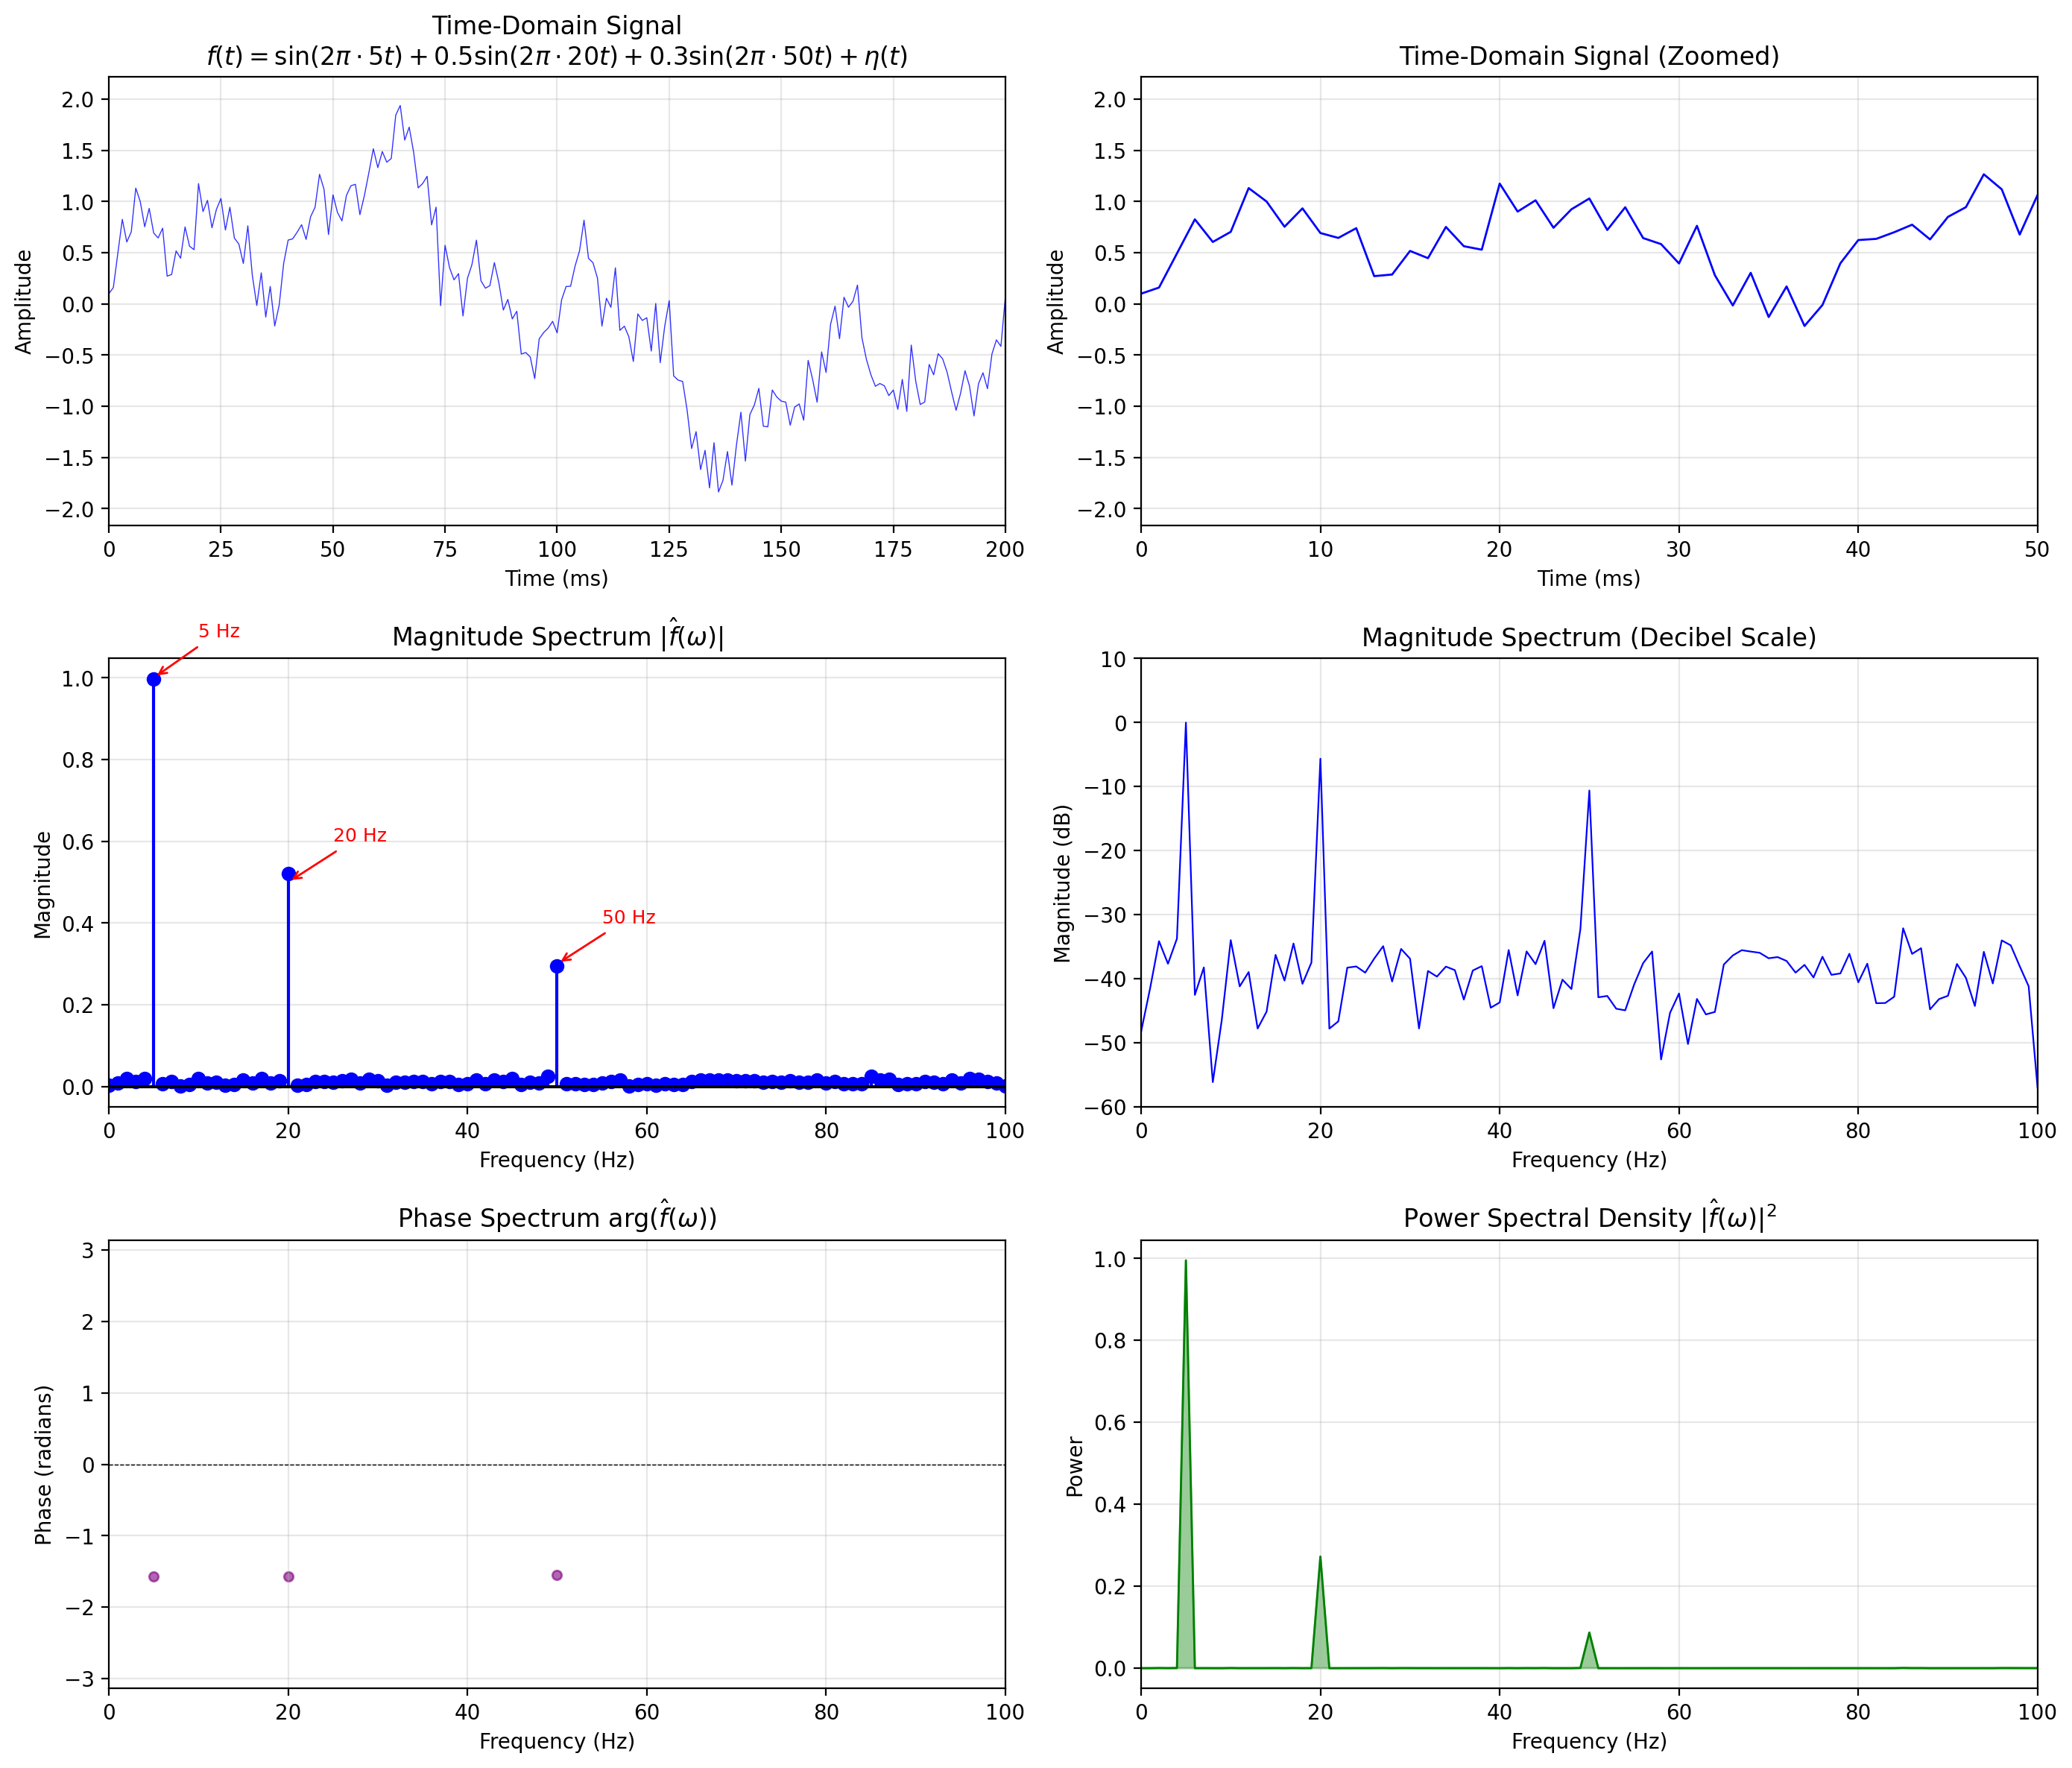


Visualization saved to 'plot.png'


In [4]:
# Create comprehensive visualization
fig = plt.figure(figsize=(14, 12))

# Panel 1: Time-domain signal
ax1 = fig.add_subplot(3, 2, 1)
ax1.plot(t * 1000, signal, 'b-', linewidth=0.5, alpha=0.8)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Time-Domain Signal\n$f(t) = \\sin(2\\pi \\cdot 5t) + 0.5\\sin(2\\pi \\cdot 20t) + 0.3\\sin(2\\pi \\cdot 50t) + \\eta(t)$')
ax1.set_xlim([0, 200])  # Show first 200 ms for clarity

# Panel 2: Zoomed time-domain
ax2 = fig.add_subplot(3, 2, 2)
ax2.plot(t * 1000, signal, 'b-', linewidth=1)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Amplitude')
ax2.set_title('Time-Domain Signal (Zoomed)')
ax2.set_xlim([0, 50])  # Show first 50 ms

# Panel 3: Magnitude spectrum (linear scale)
ax3 = fig.add_subplot(3, 2, 3)
ax3.stem(freqs_positive, magnitude_positive, linefmt='b-', markerfmt='bo', basefmt='k-')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Magnitude')
ax3.set_title('Magnitude Spectrum $|\\hat{f}(\\omega)|$')
ax3.set_xlim([0, 100])
# Annotate peaks
for freq, amp in [(f1, A1), (f2, A2), (f3, A3)]:
    ax3.annotate(f'{freq} Hz', xy=(freq, amp), xytext=(freq+5, amp+0.1),
                 arrowprops=dict(arrowstyle='->', color='red'),
                 fontsize=9, color='red')

# Panel 4: Magnitude spectrum (dB scale)
ax4 = fig.add_subplot(3, 2, 4)
magnitude_db = 20 * np.log10(magnitude_positive + 1e-10)  # Add small value to avoid log(0)
ax4.plot(freqs_positive, magnitude_db, 'b-', linewidth=0.8)
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Magnitude (dB)')
ax4.set_title('Magnitude Spectrum (Decibel Scale)')
ax4.set_xlim([0, 100])
ax4.set_ylim([-60, 10])

# Panel 5: Phase spectrum
ax5 = fig.add_subplot(3, 2, 5)
phase_positive = phase[positive_freq_mask]
# Only show phase where magnitude is significant
significant_mask = magnitude_positive > 0.05
ax5.scatter(freqs_positive[significant_mask], phase_positive[significant_mask], 
            c='purple', s=20, alpha=0.6)
ax5.set_xlabel('Frequency (Hz)')
ax5.set_ylabel('Phase (radians)')
ax5.set_title('Phase Spectrum $\\arg(\\hat{f}(\\omega))$')
ax5.set_xlim([0, 100])
ax5.set_ylim([-np.pi, np.pi])
ax5.axhline(y=0, color='k', linestyle='--', linewidth=0.5)

# Panel 6: Power Spectral Density
ax6 = fig.add_subplot(3, 2, 6)
psd = magnitude_positive ** 2
ax6.fill_between(freqs_positive, psd, alpha=0.4, color='green')
ax6.plot(freqs_positive, psd, 'g-', linewidth=1)
ax6.set_xlabel('Frequency (Hz)')
ax6.set_ylabel('Power')
ax6.set_title('Power Spectral Density $|\\hat{f}(\\omega)|^2$')
ax6.set_xlim([0, 100])

plt.tight_layout()
plt.savefig('fourier_transform_visualization_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nVisualization saved to 'plot.png'")

## Signal Reconstruction via Inverse FFT

We can demonstrate the reversibility of the Fourier Transform by filtering the signal in the frequency domain and reconstructing it.

### Low-Pass Filtering

A low-pass filter attenuates frequencies above a cutoff $f_c$:

$$H(f) = \begin{cases} 1 & |f| \leq f_c \\ 0 & |f| > f_c \end{cases}$$

In [5]:
# Demonstrate filtering in frequency domain
cutoff_freq = 30  # Hz

# Create low-pass filter
filter_mask = np.abs(frequencies) <= cutoff_freq
filtered_fft = fft_result * filter_mask

# Reconstruct signal
filtered_signal = np.real(ifft(filtered_fft))

# Verify energy conservation (Parseval's theorem)
time_domain_energy = np.sum(signal ** 2)
freq_domain_energy = np.sum(np.abs(fft_result) ** 2) / N

print(f"Energy Conservation (Parseval's Theorem):")
print(f"  Time-domain energy: {time_domain_energy:.4f}")
print(f"  Frequency-domain energy: {freq_domain_energy:.4f}")
print(f"  Relative error: {abs(time_domain_energy - freq_domain_energy)/time_domain_energy * 100:.4f}%")

Energy Conservation (Parseval's Theorem):
  Time-domain energy: 715.3558
  Frequency-domain energy: 715.3558
  Relative error: 0.0000%


## Conclusion

This notebook demonstrated the fundamental concepts of Fourier analysis:

1. **Frequency Decomposition**: The FFT successfully identified the three sinusoidal components at 5 Hz, 20 Hz, and 50 Hz with their respective amplitudes.

2. **Magnitude and Phase**: The complete frequency-domain representation includes both magnitude (amplitude) and phase information.

3. **Power Spectral Density**: The PSD shows the distribution of signal power across frequencies.

4. **Parseval's Theorem**: Energy is conserved between time and frequency domains, confirming the mathematical correctness of our transform.

The Fourier Transform remains one of the most powerful tools in signal processing, physics, and engineering, enabling analysis and manipulation of signals in ways that would be difficult or impossible in the time domain alone.